In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'We enjoyed our stay so much. The weather was not great, but everything else was perfect.',
    'Going to think twice before staying here again. The wifi was spotty and the rooms smaller than advertised',
    'The perfect place to relax and recharge.',
    'Never had such a relaxing vacation.',
    'The pictures were misleading, so I was expecting the common areas to be bigger. But the service was good.',
    'There were no clean linens when I got to my room and the breakfast options were not that many.',
    'Was expecting it to be a bit far from historical downtown, but it was almost impossible to drive through those narrow roads',
    'I thought that waking up with the chickens was fun, but I was wrong.',
    'Great place for a quick getaway from the city. Everyone is friendly and polite.',
    'Unfortunately it was raining during our stay, and there weren\'t many options for indoors activities. Everything was great, but there was literally no other oprionts besides being in the rain.',
    'The town festival was postponed, so the area was a complete ghost town. We were the only guests. Not the experience I was looking for.',
    'We had a lovely time. It\'s a fantastic place to go with the children, they loved all the animals.',
    'A little bit off the beaten track, but completely worth it. You can hear the birds sing in the morning and then you are greeted with the biggest, sincerest smiles from the owners. Loved it!',
    'It was good to be outside in the country, visiting old town. Everything was prepared to the upmost detail'
    'staff was friendly. Going to come back for sure.',
    'They didn\'t have enough staff for the amount of guests. It took some time to get our breakfast and we had to wait 20 minutes to get more information about the old town.',
    'The pictures looked way different.',
    'Best weekend in the countryside I\'ve ever had.',
    'Terrible. Slow staff, slow town. Only good thing was being surrounded by nature.',
    'Not as clean as advertised. Found some cobwebs in the corner of the room.',
    'It was a peaceful getaway in the countryside.',
    'Everyone was nice. Had a good time.',
    'The kids loved running around in nature, we loved the old town. Definitely going back.',
    'Had worse experiences.',
    'Surprised this was much different than what was on the website.',
    'Not that mindblowing.'
]

# 0: negative sentiment.  1: positive sentiment
targets = [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0]

# Splitting the dataset
train_features, test_features, train_targets, test_targets = train_test_split(corpus, targets, test_size=0.25,random_state=123)

#Turning the corpus into a tf-idf array
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, norm='l1')

In [2]:
from sklearn.neural_network import MLPClassifier

def buildMLPerceptron(train_features, train_targets, num_neurons=2):
    """ Build a Multi-layer Perceptron and fit the data
        Activation Function: ReLU
        Optimization Function: SGD, Stochastic Gradient Descent
        Learning Rate: Inverse Scaling
    """

    classifier = MLPClassifier(hidden_layer_sizes=num_neurons, max_iter=35, activation='relu', solver='sgd', verbose=10, random_state=762, learning_rate='invscaling')
    classifier.fit(train_features, train_targets)

    return classifier

train_features = vectorizer.fit_transform(train_features)
test_features = vectorizer.transform(test_features)

# Build Multi-Layer Perceptron with 3 hidden layers, each with 5 neurons
ml_percetron_model = buildMLPerceptron(train_features, train_targets, num_neurons=5)

Iteration 1, loss = 0.77580592
Iteration 2, loss = 0.77561881
Iteration 3, loss = 0.77549621
Iteration 4, loss = 0.77537552
Iteration 5, loss = 0.77525632
Iteration 6, loss = 0.77513919
Iteration 7, loss = 0.77502461
Iteration 8, loss = 0.77491295
Iteration 9, loss = 0.77480444
Iteration 10, loss = 0.77469920
Iteration 11, loss = 0.77459728
Iteration 12, loss = 0.77449868
Iteration 13, loss = 0.77440336
Iteration 14, loss = 0.77431125
Iteration 15, loss = 0.77422225
Iteration 16, loss = 0.77413626
Iteration 17, loss = 0.77405317
Iteration 18, loss = 0.77397286
Iteration 19, loss = 0.77389521
Iteration 20, loss = 0.77382009
Iteration 21, loss = 0.77374739
Iteration 22, loss = 0.77367698
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


CCC [1]
CCC 1


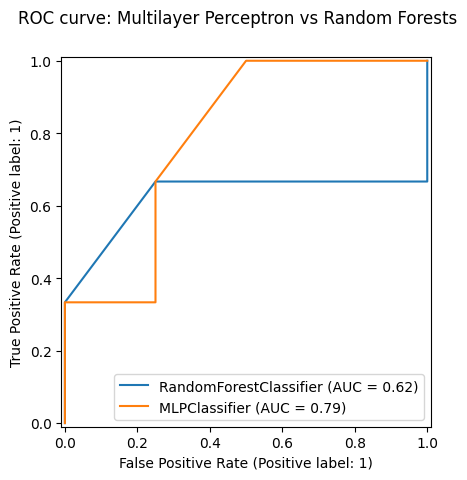

In [5]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, RocCurveDisplay

def plot_roc(model, test_features, test_targets):
    """
    Plotting the ROC curve for a given Model and the ROC curve for a Random Forests Models
    """

    # comparing the given model with a Random Forests model
    random_forests_model = RandomForestClassifier(random_state=42)
    random_forests_model.fit(train_features, train_targets)
    text = 'Best weekend i ever had.'
    text_sample = vectorizer.transform([text])
    prd = random_forests_model.predict(text_sample)
    print("CCC" , prd)
    print("CCC" , prd[0])
    rfc_disp = RocCurveDisplay.from_estimator(random_forests_model, test_features, test_targets)
    model_disp = RocCurveDisplay.from_estimator(model, test_features, test_targets, ax=rfc_disp.ax_)
    model_disp.figure_.suptitle("ROC curve: Multilayer Perceptron vs Random Forests")

    plt.show()

# using perceptron model as input
plot_roc(ml_percetron_model, test_features, test_targets)